In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats
# from scipy.stats import beta

Optimal threshold: 0.6666666666666666


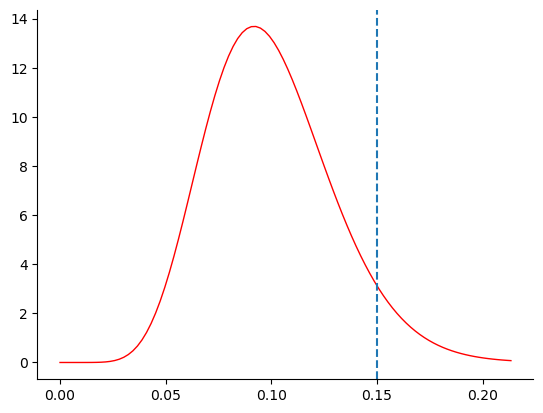

In [2]:
n_patients = 100000

targeted_incidence = 0.1
beta_counts = 100
a = targeted_incidence * beta_counts
b = (1-targeted_incidence) * beta_counts

threshold = 0.15

# Define costs/utilities 
u_tp = 1
u_fn = -2
u_fp = -1
u_tn = 0.5

odds = (u_tp - u_fn) / (u_tn - u_fp)
optimal_threshold = odds / (1 + odds)
print('Optimal threshold: {}'.format(optimal_threshold))

# Plot the distribution
x = np.linspace(scipy.stats.beta.ppf(0.00, a, b),
                scipy.stats.beta.ppf(0.999, a, b), 100)

plt.plot(
    x, scipy.stats.beta.pdf(x, a, b), 'r-', lw=1, alpha=1, label='beta pdf'
)
plt.axvline(threshold, linestyle='--')
sns.despine()
plt.show()



In [3]:
# Generate some data
risks = np.random.beta(a, b, n_patients)
labels = np.random.binomial(n=1, p=risks)
predictions = risks >= threshold

print('Incidence (empirical): {}'.format(labels.mean()))
print('Incidence (analytic): {}'.format(scipy.stats.beta.expect(args=(a, b))))
print('Rate predicted positive (empirical): {}'.format(predictions.mean()))
print('Rate predicted positive (analytic): {}'.format(scipy.stats.beta.sf(threshold, a, b)))

# Compute precision
precision=(labels[predictions==1]).mean()
print('Precision (empirical): {}'.format(precision))
print('Precision (analytic): {}'.format(scipy.stats.beta.expect(args=(a, b), lb=threshold, conditional=True)))

Incidence (empirical): 0.10099
Incidence (analytic): 0.10000000000000035
Rate predicted positive (empirical): 0.0596
Rate predicted positive (analytic): 0.05952990857287155
Precision (empirical): 0.1709731543624161
Precision (analytic): 0.16705451575880384
